<a href="https://colab.research.google.com/github/saadswe2020/Data-Science-Masters/blob/main/Predicting_California_Housing_Sale_using_Tesnsorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-nu

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Epoch 1/400
112/112 [==============================] - 1s 7ms/step - loss: 56787248916.3894 - val_loss: 55719198720.0000
Epoch 2/400
112/112 [==============================] - 0s 2ms/step - loss: 56158262987.8938 - val_loss: 55717945344.0000
Epoch 3/400
112/112 [==============================] - 0s 2ms/step - loss: 55701247256.9204 - val_loss: 55714910208.0000
Epoch 4/400
112/112 [==============================] - 0s 2ms/step - loss: 56486497107.8230 - val_loss: 55709073408.0000
Epoch 5/400
112/112 [==============================] - 0s 2ms/step - loss: 56278765821.7345 - val_loss: 55699652608.0000
Epoch 6/400
112/112 [==============================] - 0s 2ms/step - loss: 56679303621.0973 - val_loss: 55685722112.0000
Epoch 7/400
112/112 [==============================] - 0s 2ms/step - loss: 56757329050.0531 - val_loss: 55666749440.0000
Epoch 8/400
112/112 [==============================] - 0s 2ms/step - loss: 56283919024.7080 - val_loss: 55641878528.0000
Epoch 9/400
112/112 [===========

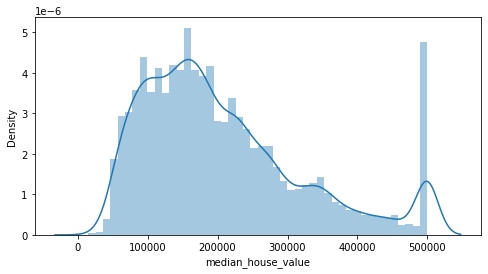

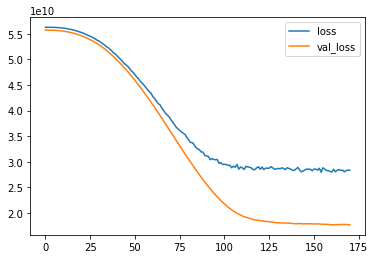

In [ ]:
import sys
import traceback
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error,mean_absolute_error

%matplotlib inline



def main():
    try:
        # Reading data into a pandas dataframe (uploaded the file to colab locally)
        df = pd.read_csv('/content/california_housing_sale_regression.csv')
        print(df.head())
        # Explore the data
        df.info()
        # Count the null values 
        print(df.isnull().sum())
        # Drop the null values
        df.dropna(inplace=True)
        df=df.drop('ocean_proximity', axis=1)
        print(df.columns)
        print(df.describe())
        plt.figure(figsize=(8,4))
        sns.distplot(df['median_house_value'])
        # Train Test Split
        X = df.drop('median_house_value',axis=1)
        y = df['median_house_value']
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
        # Scaling 
        scaler = MinMaxScaler()
        X_train= scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        # Create the model 
        model = Sequential()
        model.add(Dense(8,activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(3,activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # Train the model

        early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        model.fit(x=X_train,y=y_train.values,
        validation_data=(X_test,y_test.values),
        batch_size=128,epochs=400, callbacks=[early_stop])

        losses = pd.DataFrame(model.history.history)
        losses.plot()

        # Evaluation 
        predictions = model.predict(X_test)
        mean_absolute_error(y_test,predictions)
        np.sqrt(mean_squared_error(y_test,predictions))



    except:

        exception_type, exception_value, exception_traceback = sys.exc_info()
        print("Exception Type: {}\nException Value: {}".format(exception_type, exception_value))
        file_name, line_number, procedure_name, line_code = traceback.extract_tb(exception_traceback)[-1]
        print("File Name: {}\nLine Number: {}\nProcedure Name: {}\nLine Code: {}".format(file_name, line_number,
                                                                                         procedure_name, line_code))
    else:
        pass

if __name__ == "__main__":
    main()